# Assignment for Unit 1 content

This assignment is designed to make sure you have proficiency with viewing and manipulating sounds.      

Sources used:
https://huggingface.co/docs/datasets/v1.2.1/loading_datasets.html#:~:text=%3E%3E%3E%20from%20datasets%20import%20load_dataset%20%3E%3E%3E%20dataset%20%3D,if%20it%E2%80%99s%20not%20already%20stored%20in%20the%20library.

For convertin Hz to note:
https://newt.phys.unsw.edu.au/music/note/


In [2]:
import librosa  # For manipulating audio
import numpy as np
from IPython.display import Audio  # For displaying audio

## Viewing audio

Choose a different example librosa file than the one used in the tutorial.
1. Load it into an array using librosa. Print the first 20 elements of the array and the sample rate.
2. Display the audio's time-domain representation.
3. Display the discrete Fourier transform of its first 0.2 seconds of audio (this is likely more than 4096 samples. How can you compute the number of samples you need)?
4. Identify the most prominent note in the first 0.2 seconds of audio.
5. Divide the sample rate by 2 (without resampling the audio) and recompute/display the new Fourier transform. What happens in the graph?
6. Display its mel-spectrogram. Write one sentence about how the spectrogram represents the changes in the sound over time.

In [11]:
import matplotlib.pyplot as plt

array, sampling_rate = librosa.load(librosa.ex("brahms"))
Audio(filename=librosa.ex("brahms"))


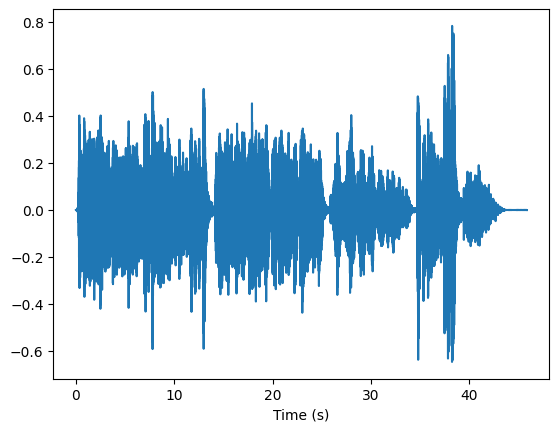

In [5]:
time = np.linspace(0, len(array)/sampling_rate, num=len(array))
plt.plot(time, array)
plt.xlabel("Time (s)")
plt.show()

In [15]:
sampling_rate * .2
#calculating number of samples needed for displaying first 0.2 seconds

4410.0

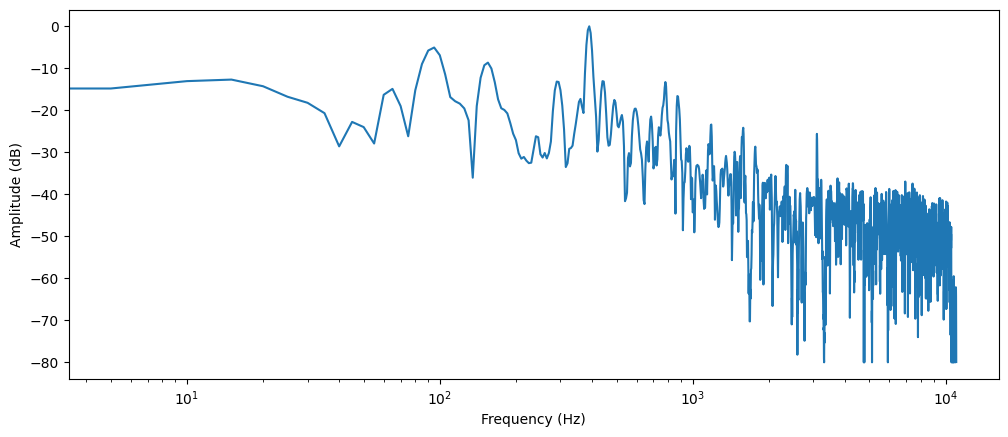

In [16]:
dft_input = array[:4410]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

In [17]:
#most prominent note is around 600-650Hz b/c the peak is the highest there
#therefore it's most likely note is either  D5 or E5

In [18]:
sampling_rate / 2

11025.0

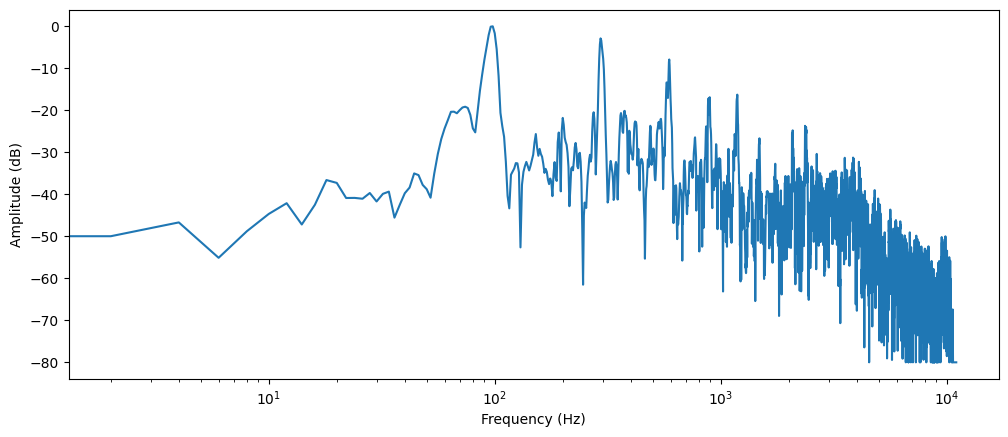

In [19]:
dft_input = array[:11025]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

In [20]:
#dividng sampling_rate by 2 changes the amplitude of the graph

In [29]:
len(array) / 10


101088.0

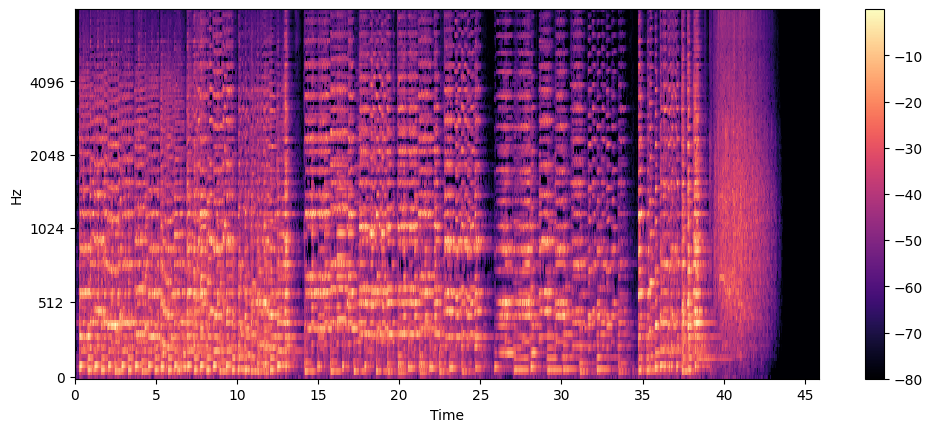

In [32]:
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()

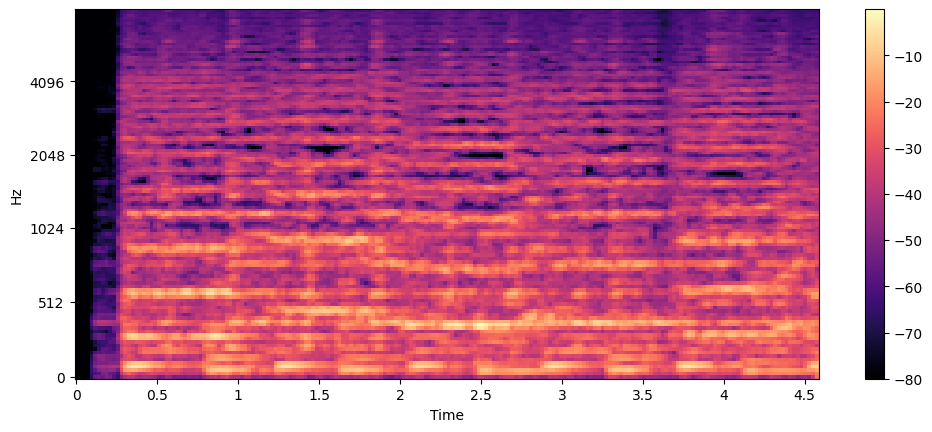

In [37]:
#mel spectrogram for 1/10 of samples because graph to condensed
S = librosa.feature.melspectrogram(y=array[:101088], sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()

While difficult to analyze, we notice that the frequency is hovering more strongly at a low frequency where it's most loud throughout the entire duration of the given time period suggesting the given audio is playing primarily low pitch notes.

## Working with datasets

Choose a different dataset than the one used in the tutorial. Load it using the datasets library and print some of the attributes of a random example. If necessary, convert them to string representations.

In [ ]:
# pip install datasets[audio]
#!pip install datasets[audio]
from datasets import load_dataset

minds = load_dataset("mozilla-foundation/common_voice_11_0", "cv", split="train")
minds

Generating train split: 0 examples [00:00, ? examples/s]


Reading metadata...: 1546it [00:00, 57263.41it/s]


Generating validation split: 0 examples [00:00, ? examples/s]


Reading metadata...: 1142it [00:00, 66331.01it/s]


Generating test split: 0 examples [00:00, ? examples/s]


Reading metadata...: 1285it [00:00, 68591.94it/s]


Generating other split: 0 examples [00:00, ? examples/s]


Reading metadata...: 1329it [00:00, 72619.89it/s]


Generating invalidated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 2038it [00:00, 48879.18it/s]


Dataset({
    features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
    num_rows: 1546
})

In [ ]:
common = minds
example = common[0]
example

{'client_id': 'd671834f547759a302d675c1eb2b6e63537d08b11724620f6fbf74828dd2fbdc76b4a91d2ff634b5e3641699847cf7cdd0d8d36bff4a3a4158c11d46f0174b5a',
 'path': '/root/.cache/huggingface/datasets/downloads/extracted/0d65d71b81f3c7a2e3e4dc39b08b5c4fd720aa49851f446337c9e784a299d258/cv_train_0/common_voice_cv_18025612.mp3',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/0d65d71b81f3c7a2e3e4dc39b08b5c4fd720aa49851f446337c9e784a299d258/cv_train_0/common_voice_cv_18025612.mp3',
  'array': array([ 0.00000000e+00,  5.45543428e-15, -3.08613541e-14, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]),
  'sampling_rate': 48000},
 'sentence': 'Проблемине историпе ҫыхӑнтарма пӗлмелле, хамӑр истори тӑрӑх шухӑшламалла.',
 'up_votes': 2,
 'down_votes': 0,
 'age': 'fourties',
 'gender': 'male',
 'accent': '',
 'locale': 'cv',
 'segment': ''}

In [ ]:
id2label = minds.features["sampling_rate"].int2str
id2label(example["sampling_rate"])

In [ ]:
columns_to_remove = ["up_votes", "down_votes"]
common = common.remove_columns(columns_to_remove)
common

Dataset({
    features: ['client_id', 'path', 'audio', 'sentence', 'age', 'gender', 'accent', 'locale', 'segment'],
    num_rows: 1546
})

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.1/305.1 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 8.0 MB/s

In [ ]:
!pip install typing_extensions

In [ ]:
import typing_extensions
import gradio as gr

def generate_audio():
  example = common.shuffle()[0]
  audio = example["audio"]
  return (
      audio["sampling_rate"],
      audio["array"],

  )

with gr.Blocks() as demo:
  with gr.Column():
    for _ in range(4):
      audio, label = generate_audio()
      output = gr.Audio(audio, label = label)

ImportError: cannot import name 'Doc' from 'typing_extensions' (/usr/local/lib/python3.10/dist-packages/typing_extensions.py)

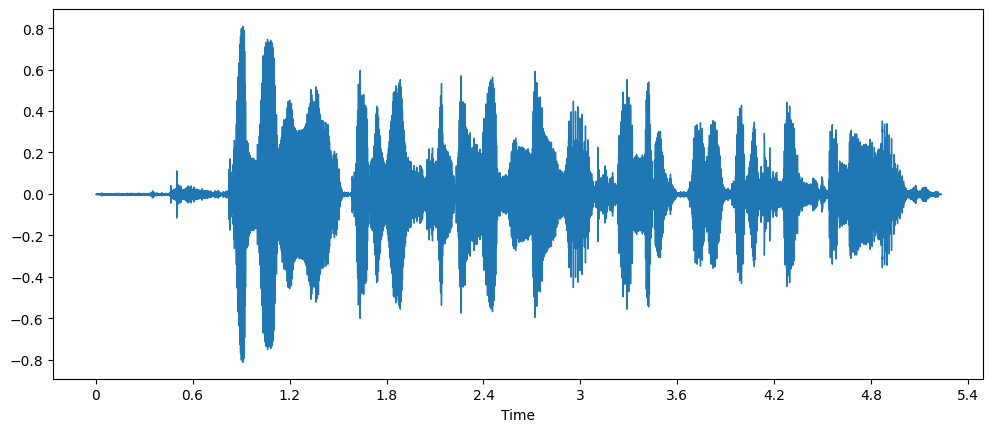

In [ ]:
import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)
#duration = librosa.get_duration(y=array, sr=sampling_rate)

#plt.xticks(range(0, int(duration) + 1))


([<matplotlib.axis.XTick at 0x7d3f7afc7250>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

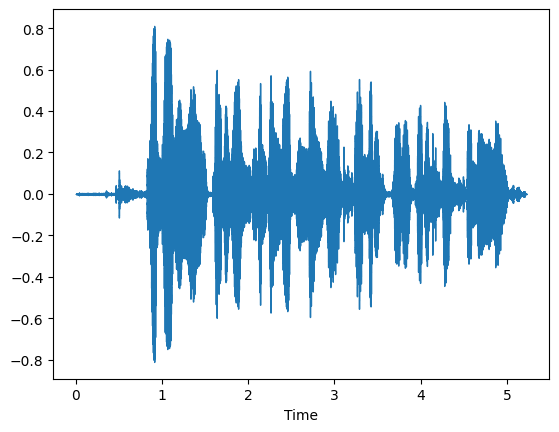

In [ ]:
librosa.display.waveshow(array, sr=sampling_rate)
duration = librosa.get_duration(y=array, sr=sampling_rate)
plt.xticks(range(0, int(duration) + 1))
